In [1]:

import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import os

df = pd.read_csv("Staphylococcus_aureus_Infection_Data.csv")

In [2]:
df2 = df.dropna() 
df2.drop(['#','ThirtyDay_Death','SixWeek_Death','ThreeMo_Death','SixMo_Death','NineMo_Death'], axis='columns', inplace=True)
df2= df2.replace('00-10', 00).replace('20-Nov', 11).replace('21-30', 21).replace('31-40', 31).replace('41-50', 41).replace('51-60', 51).replace('61-70', 61).replace('71-80', 71).replace('80+', 80)
x=df2.iloc[:, df2.columns != 'OneYear_Death']
y=df2.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

c:\Users\monke\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7126126126126127

In [11]:
clf.score(X_train,y_train)

0.8262339418526031

<AxesSubplot:>

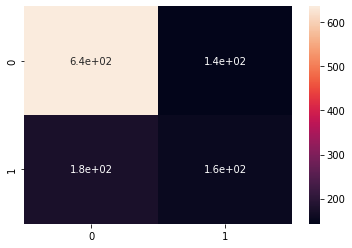

In [5]:
y_pred=clf.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True)